NFU CSIE 11363111 陳瑞鑫

DCT function

In [ ]:
import numpy as np

def c(x):
  if x == 0:
    return 1/np.sqrt(2)
  else:
    return 1

def dct(array_8x8):
  array_F = np.zeros((8, 8))

  for u in range(8):
    for v in range(8):
      sum_val = 0
      for j in range(8):
        for k in range(8):
          sum_val += array_8x8[j, k] * np.cos((2*j+1)*u*np.pi/16) * np.cos((2*k+1)*v*np.pi/16)
      array_F[u, v] = c(u) * c(v) / 4 * sum_val

  return array_F # Added return statement to return the calculated array

Execute DCT()

In [ ]:
from PIL import Image
import numpy as np

# 開啟影像
image = Image.open('lenna.bmp')

# 取得影像尺寸
width, height = image.size

# 建立空陣列來儲存區塊
blocks = []
dct_blocks = []

# 以 8x8 像素區塊建立迴圈
for i in range(0, height, 8):
    for j in range(0, width, 8):
        # 取得區塊
        block = image.crop((j, i, j + 8, i + 8))

        # 將區塊轉換為 NumPy 陣列
        block_array = np.array(block)

        dct_array = dct(block_array)
        dct_block = Image.fromarray(dct_array)

        # 將區塊陣列附加到 blocks 陣列
        blocks.append(block_array)

        dct_blocks.append(dct_block)

# blocks 陣列現在包含所有 8x8 像素區塊

Store DCT image

In [ ]:
from PIL import Image
import numpy as np

# ... (your existing code) ...

# 計算新影像的尺寸
new_width = width
new_height = height

# 建立新影像
new_image = Image.new('L', (new_width, new_height))  # 使用 'L' 模式表示灰階影像

# 將 dct_blocks 的內容複製到新影像
k = 0
for i in range(0, height, 8):
    for j in range(0, width, 8):
        # 取得 dct_block
        dct_block = dct_blocks[k]
        k += 1

        # 將 dct_block 貼到新影像
        new_image.paste(dct_block, (j, i))

# 儲存新影像
new_image.save('lenna_dct.bmp')

Show DCT image

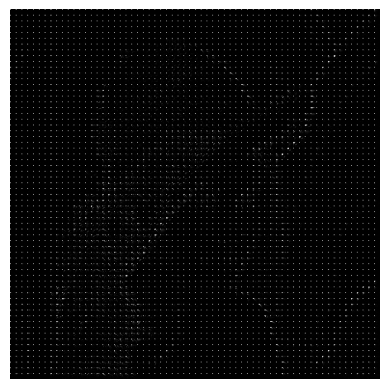

In [ ]:
from PIL import Image
import matplotlib.pyplot as plt

# Open the image using PIL
image = Image.open("lenna_dct.bmp")

# Display the image using matplotlib
plt.imshow(image,cmap='gray')
plt.axis('off')  # Turn off axis numbers and ticks
plt.show()

DCT decode

In [ ]:
import numpy as np
from PIL import Image

# ... (your existing code for DCT and image loading) ...

def idct(array_8x8):
  """
  Performs the inverse discrete cosine transform (IDCT) on an 8x8 block.
  """
  array_f = np.zeros((8, 8))
  for j in range(8):
    for k in range(8):
      sum_val = 0
      for u in range(8):
        for v in range(8):
          sum_val += c(u) * c(v) * array_8x8[u, v] * np.cos((2 * j + 1) * u * np.pi / 16) * np.cos((2 * k + 1) * v * np.pi / 16)
      array_f[j, k] = 1 / 4 * sum_val
  return array_f

# 建立空陣列來儲存解壓縮區塊
idct_blocks = []

# 對每個 dct_block 執行 IDCT
for dct_block in dct_blocks:
    # 將 dct_block 轉換為 NumPy 陣列
    dct_array = np.array(dct_block)

    # 執行 IDCT
    idct_array = idct(dct_array)

    # 將 IDCT 陣列轉換回 PIL 影像
    idct_block = Image.fromarray(idct_array.astype(np.uint8))  # 轉換為 uint8

    # 將解壓縮區塊附加到 idct_blocks 陣列
    idct_blocks.append(idct_block)

# 建立新影像
decoded_image = Image.new('L', (width, height))

# 將 idct_blocks 的內容複製到新影像
k = 0
for i in range(0, height, 8):
    for j in range(0, width, 8):
        # 取得 idct_block
        idct_block = idct_blocks[k]
        k += 1

        # 將 idct_block 貼到新影像
        decoded_image.paste(idct_block, (j, i))

# 儲存解壓縮影像
decoded_image.save('lenna_decode.bmp')

Show DCT decode

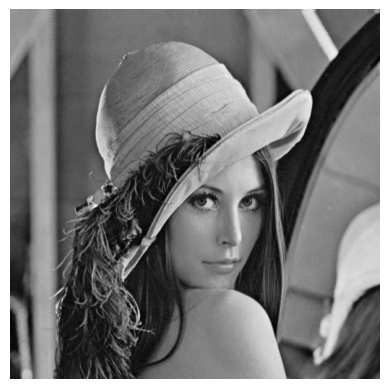

In [ ]:
from PIL import Image
import matplotlib.pyplot as plt

# Open the image using PIL
image = Image.open("lenna_decode.bmp")

# Display the image using matplotlib
plt.imshow(image, cmap='gray')
plt.axis('off')  # Turn off axis numbers and ticks
plt.show()

DCT function: 4 * 4 mask

In [ ]:
import numpy as np

def c(x):
  if x == 0:
    return 1/np.sqrt(2)
  else:
    return 1

def dct_rightDown0(array_8x8):
  array_F = np.zeros((8, 8))

  for u in range(8):
    for v in range(8):
      sum_val = 0
      for j in range(8):
        for k in range(8):
          sum_val += array_8x8[j, k] * np.cos((2*j+1)*u*np.pi/16) * np.cos((2*k+1)*v*np.pi/16)
      if u>=4 or v>=4:
        array_F[u, v] = 0
      else:
        array_F[u, v] = c(u) * c(v) / 4 * sum_val

  return array_F # Added return statement to return the calculated array

Execute dct_rightDown0

In [ ]:
from PIL import Image
import numpy as np

# 開啟影像
image = Image.open('lenna.bmp')

# 取得影像尺寸
width, height = image.size

# 建立空陣列來儲存區塊
blocks = []
dct_rightdown0_blocks = []

# 以 8x8 像素區塊建立迴圈
for i in range(0, height, 8):
    for j in range(0, width, 8):
        # 取得區塊
        block = image.crop((j, i, j + 8, i + 8))

        # 將區塊轉換為 NumPy 陣列
        block_array = np.array(block)

        dct_array = dct_rightDown0(block_array)
        dct_block = Image.fromarray(dct_array)

        # 將區塊陣列附加到 blocks 陣列
        blocks.append(block_array)

        dct_rightdown0_blocks.append(dct_block)

# blocks 陣列現在包含所有 8x8 像素區塊

Store 4 * 4 Mask DCT image

In [ ]:
from PIL import Image
import numpy as np

# ... (your existing code) ...

# 計算新影像的尺寸
new_width = width
new_height = height

# 建立新影像
new_image = Image.new('L', (new_width, new_height))  # 使用 'L' 模式表示灰階影像

# 將 dct_blocks 的內容複製到新影像
k = 0
for i in range(0, height, 8):
    for j in range(0, width, 8):
        # 取得 dct_block
        dct_block = dct_rightdown0_blocks[k]
        k += 1

        # 將 dct_block 貼到新影像
        new_image.paste(dct_block, (j, i))

# 儲存新影像
new_image.save('lenna_dct_rightdown0.bmp')

Show 4 * 4 Mask DCT image

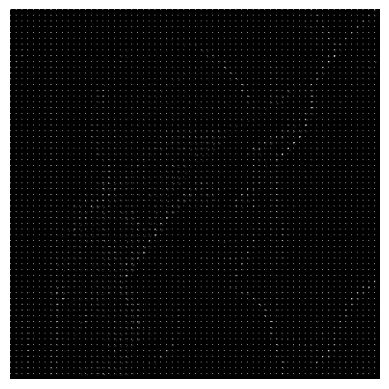

In [ ]:
from PIL import Image
import matplotlib.pyplot as plt

# Open the image using PIL
image = Image.open("lenna_dct_rightdown0.bmp")

# Display the image using matplotlib
plt.imshow(image,cmap='gray')
plt.axis('off')  # Turn off axis numbers and ticks
plt.show()

4 * 4 Mask DCT decode

In [ ]:
import numpy as np
from PIL import Image

# ... (your existing code for DCT and image loading) ...

def idct(array_8x8):
  """
  Performs the inverse discrete cosine transform (IDCT) on an 8x8 block.
  """
  array_f = np.zeros((8, 8))
  for j in range(8):
    for k in range(8):
      sum_val = 0
      for u in range(8):
        for v in range(8):
          sum_val += c(u) * c(v) * array_8x8[u, v] * np.cos((2 * j + 1) * u * np.pi / 16) * np.cos((2 * k + 1) * v * np.pi / 16)
      array_f[j, k] = 1 / 4 * sum_val
  return array_f

# 建立空陣列來儲存解壓縮區塊
idct_blocks_rightdown0 = []

# 對每個 dct_block 執行 IDCT
for dct_block in dct_rightdown0_blocks:
    # 將 dct_block 轉換為 NumPy 陣列
    dct_array = np.array(dct_block)

    # 執行 IDCT
    idct_array = idct(dct_array)

    # 將 IDCT 陣列轉換回 PIL 影像
    idct_block = Image.fromarray(idct_array.astype(np.uint8))  # 轉換為 uint8

    # 將解壓縮區塊附加到 idct_blocks 陣列
    idct_blocks_rightdown0.append(idct_block)

# 建立新影像
decoded_image = Image.new('L', (width, height))

# 將 idct_blocks 的內容複製到新影像
k = 0
for i in range(0, height, 8):
    for j in range(0, width, 8):
        # 取得 idct_block
        idct_block = idct_blocks_rightdown0[k]
        k += 1

        # 將 idct_block 貼到新影像
        decoded_image.paste(idct_block, (j, i))

# 儲存解壓縮影像
decoded_image.save('lenna_decode_rightdown0.bmp')

Show 4 * 4 Mask DCT decode

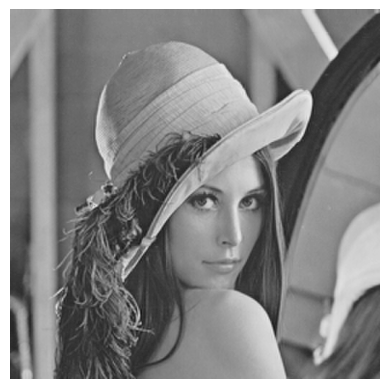

In [ ]:
from PIL import Image
import matplotlib.pyplot as plt

# Open the image using PIL
image = Image.open("lenna_decode_rightdown0.bmp")

# Display the image using matplotlib
plt.imshow(image, cmap='gray')
plt.axis('off')  # Turn off axis numbers and ticks
plt.show()

Calculate MSE

In [ ]:
import numpy as np
from PIL import Image

# Load the images
img1 = Image.open('lenna_decode.bmp')
img2 = Image.open('lenna_decode_rightdown0.bmp')

# Convert images to NumPy arrays
img1_array = np.array(img1)
img2_array = np.array(img2)

# Calculate the MSE
mse = np.mean((img1_array - img2_array)**2)

# Print the MSE
print(f"MSE: {mse}")

MSE: 13.15005874633789


In [ ]:
!pip install Pillow scikit-image

Calculate PSNR

In [ ]:
from PIL import Image
import numpy as np
from skimage.metrics import peak_signal_noise_ratio

# 載入影像
img1 = Image.open('lenna_decode.bmp')
img2 = Image.open('lenna_decode_rightdown0.bmp')

# 將影像轉換為 NumPy 陣列
img1_array = np.array(img1)
img2_array = np.array(img2)

# 計算 PSNR
psnr = peak_signal_noise_ratio(img1_array, img2_array)

# 顯示 PSNR
print(f"PSNR: {psnr}")

PSNR: 35.58263780078047
